## Muffins Vs Cup Cakes Prediciton Analysis


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale= 1.2)
from sklearn import svm


In [15]:
recipes= pd.read_csv('Cupcakes vs Muffins.csv')
recipes.head()


,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


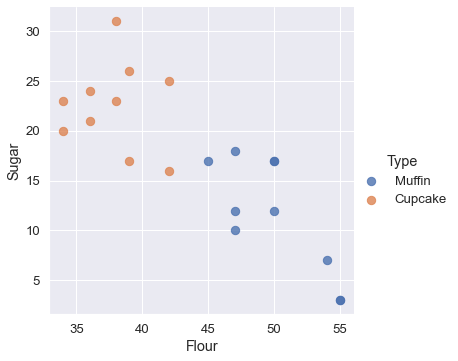

In [18]:
  sns.lmplot('Flour', 'Sugar', data =recipes,hue='Type', fit_reg= False, scatter_kws ={'s':70});

In [25]:
#processing the data, where hereafter i dont need the labels like muffins or cupcakes
type_label =  np.where(recipes['Type']== 'Muffin', 0, 1) #if muffins- -0, or else it will assign as 1- cupcakes

#to remove the 'Type' column
recipes_feature = recipes.columns.values[1:].tolist() #0-Type, [1:end] where 1 represents from Flour, till Salt
recipes_feature 

#ingredients = recipes[recipes_feature].values..... it'll return all the values associated with it
ingredients  = recipes[['Flour','Sugar']].values
ingredients


array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

In [29]:
# fit model
model = svm.SVC (kernel = 'linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [30]:
# seperting hyperplane
w= model.coef_[0]
a= -w[0]/w[1]
xx= np.linspace(30,60)
yy = a*xx - (model.intercept_[0])/w[1]

#plotting parallel line that seperated the hyperplane and pass through support vectors
b= model.support_vectors_[0]
yy_down = a*xx + (b[1]-a *b[0])
b=model.support_vectors_[-1]
yy_up = a*xx + (b[1]-a*b[0])


C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


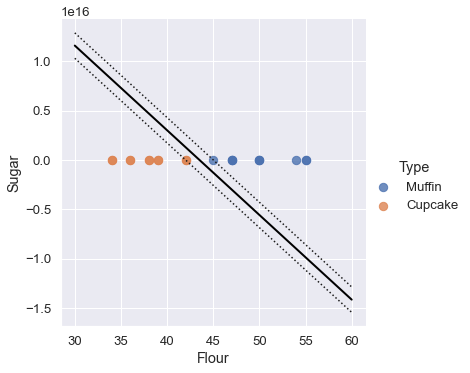

In [35]:
sns.lmplot('Flour',"Sugar", hue= 'Type',data= recipes, scatter_kws = {'s':70}, fit_reg =False)
plt.plot(xx,yy, linewidth=2, color ='black')
plt.plot(xx, yy_down, 'k:')
plt.plot(xx, yy_up, 'k:');

In [38]:
#function to predict

def Muffin_or_cupcake(Flour, Sugar):
    if (model.predict([[Flour,Sugar]])) == 0:   # Already we defined as muffin= 0, cupcake= 1
        print("Yeah! It's a Muffin😀")
    else:
        print("uh! It's a cupcake, Buddy😋")

In [37]:
#prediciton 
Muffin_or_cupcake(40,34)

uh! It's a cupcake, Buddy😋
